# Topic Modeling the SEP using LDA

Let's get our files into one huge list into memory.

In [1]:
import os
import ast

In [2]:
final_set = []
for f in os.listdir('sep_articles_lemmatized/'):
    with open('sep_articles_lemmatized/' + f) as text:
        final_set.append(ast.literal_eval(text.read()))

## Preparing the corpus
Topic modeling requires us to turn the text into a corpus. A document-term matrix is simply a matrix where the rows are documents (sentences, paragraphs, texts, etc.) and the columns are words. The matrix thus represents for each document, how many times a word appears in it. 

To build the matrix, we need two things:
* Dictionary: This maps words to id's which will allow the model to know which words are which.
* Corpus: The matrix itself. This doesn't include the words themselves, but that's why we build a dictionary first.

In [3]:
import gensim
from gensim import corpora

Let's create the dictionary first. This uses gensim's corpora.Dictionary() function.

In [4]:
dictionary = corpora.Dictionary(final_set)

With the dictionary at hand, let's create the corpus.

In [5]:
corpus = [dictionary.doc2bow(text) for text in final_set]

## Building the model
Now we are ready to build our model! We will build an LDA (Latent Dirichlet Allocation) model. This video explains this model very nicely: https://www.youtube.com/watch?v=NYkbqzTlW3w

### Attempt #1 :Topics = 5

In [6]:
import time

In [30]:
start = time.clock()
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto')
end = time.clock()
print "Took %s" % (end - start)

KeyboardInterrupt: 

Running a LSI Model

In [35]:
start = time.clock()
lsi_model = gensim.models.lsimodel.LsiModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           chunksize=100)
end = time.clock()
print "Took %s" % (end - start)

Took 1005.122485


In [36]:
# Print the Keyword in the 10 topics
for topic in lsi_model.print_topics():
    print topic

(0, u'0.210*"theory" + 0.162*"see" + 0.133*"way" + 0.131*"view" + 0.128*"make" + 0.117*"world" + 0.114*"object" + 0.110*"case" + 0.110*"state" + 0.110*"reason"')
(1, u'0.312*"moral" + -0.260*"theory" + -0.237*"set" + -0.221*"logic" + 0.162*"human" + -0.148*"model" + 0.145*"god" + 0.143*"reason" + 0.140*"good" + 0.129*"person"')
(2, u'-0.260*"god" + -0.249*"object" + 0.238*"moral" + -0.204*"experience" + 0.173*"right" + -0.172*"thing" + -0.159*"world" + 0.149*"theory" + 0.148*"social" + 0.134*"set"')
(3, u'-0.317*"moral" + -0.232*"truth" + -0.205*"belief" + -0.198*"true" + -0.195*"proposition" + 0.185*"philosophy" + -0.160*"property" + 0.156*"work" + 0.150*"science" + -0.149*"reason"')
(4, u'0.384*"god" + -0.326*"experience" + 0.231*"logic" + -0.215*"content" + -0.200*"state" + -0.187*"theory" + -0.159*"consciousness" + -0.147*"mental" + -0.132*"object" + 0.126*"set"')
(5, u'-0.320*"god" + -0.245*"game" + 0.243*"object" + -0.188*"state" + -0.187*"agent" + -0.178*"belief" + 0.162*"truth"

In [28]:
# Compute Coherence Score
coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=final_set, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print 'Coherence Score: %s' % coherence_lda

Coherence Score: 0.49028499050108004


In [7]:
def buildmodel(topics, passes=10):
    print "--------------"
    print "Topics = %s" % topics
    print "Passes = %s" % passes
    start = time.clock()
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=topics, 
                                           #random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=passes,
                                           alpha='auto',
                                           per_word_topics=True)
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, texts=final_set, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    end = time.clock()
    total_time = end - start
    print "Coherence score = %s" % coherence_lda
    print "Took me %ss" % (total_time)
    print "--------------"
    return [topics, coherence_lda, total_time, passes, lda_model]

In [9]:
import pandas as pd
import seaborn as sns

In [ ]:
models = []
coherence_scores = []

In [12]:
for x in xrange(21, 30):
    for y in xrange(0, 5):
        data = buildmodel(x, passes=1)
        models.append(data[4])
        coherence_scores.append(data[:3])

--------------
Topics = 21
Passes = 1
Coherence score = 0.44759473131799393
Took me 103.726697s
--------------
--------------
Topics = 21
Passes = 1
Coherence score = 0.43402225956382556
Took me 112.268414s
--------------
--------------
Topics = 21
Passes = 1
Coherence score = 0.44406995019743706
Took me 111.505534s
--------------
--------------
Topics = 21
Passes = 1
Coherence score = 0.4558899252703017
Took me 110.450165s
--------------
--------------
Topics = 21
Passes = 1
Coherence score = 0.43345876956559226
Took me 108.944333s
--------------
--------------
Topics = 22
Passes = 1
Coherence score = 0.4414294178284477
Took me 109.619932s
--------------
--------------
Topics = 22
Passes = 1
Coherence score = 0.43797516257452906
Took me 110.563714s
--------------
--------------
Topics = 22
Passes = 1
Coherence score = 0.43809785654561006
Took me 109.295679s
--------------
--------------
Topics = 22
Passes = 1
Coherence score = 0.45354606513949564
Took me 107.228516s
--------------
---

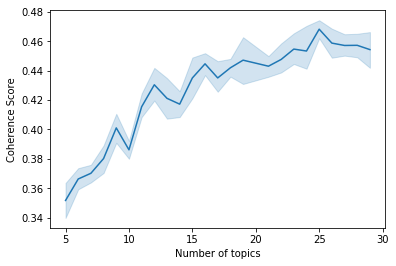

In [13]:
coherence_df = pd.DataFrame(columns=['Number of topics', 'Coherence Score', 'Time'], data=coherence_scores)
sns.lineplot(x="Number of topics", y="Coherence Score", data=coherence_df)

In [23]:
lda_model = [model for model in models if model.num_topics == 25][0]

In [25]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [29]:
pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
14     11.668560        1       1  0.095169 -0.033173
18      9.609636        1       2 -0.114083  0.062625
11      8.746779        1       3 -0.107133 -0.015350
13      8.058441        1       4 -0.080325 -0.129124
10      6.901541        1       5 -0.087615  0.058895
9       6.490117        1       6 -0.043441 -0.054810
6       5.337385        1       7 -0.112685  0.029853
5       5.272243        1       8 -0.149449  0.027294
8       5.244462        1       9 -0.083692 -0.000884
2       4.921521        1      10  0.011306 -0.089308
7       4.603325        1      11 -0.064593  0.076888
15      3.449095        1      12  0.005963  0.092566
17      3.416537        1      13  0.070091  0.116827
0       3.372712        1      14 -0.059060 -0.102562
16      3.306948        1      15  0.037760  0.120401
3       2.860515        1      16  0.057200  0.048509
19      2.239070        1      17  0.072552  0.080132
12      1.917433        1      18  0.243824  0.096046
4       1.687253        1      19  0.057419 -0.308056
1       0.896427        1      20  0.250790 -0.076770, topic_info=       Category          Freq         Term         Total  loglift  logprob
term                                                                      
21917   Default  22939.000000          god  22939.000000  30.0000  30.0000
94009   Default  25823.000000        moral  25823.000000  29.0000  29.0000
51623   Default  20648.000000   experience  20648.000000  28.0000  28.0000
60859   Default  20476.000000       belief  20476.000000  27.0000  27.0000
38972   Default  16550.000000       social  16550.000000  26.0000  26.0000
71131   Default  23272.000000   philosophy  23272.000000  25.0000  25.0000
37716   Default  28138.000000       object  28138.000000  24.0000  24.0000
100140  Default   9820.000000         kant   9820.000000  23.0000  23.0000
40608   Default   7992.000000        woman   7992.000000  22.0000  22.0000
75275   Default  18313.000000        logic  18313.000000  21.0000  21.0000
72763   Default  52812.000000       theory  52812.000000  20.0000  20.0000
64002   Default  15931.000000      science  15931.000000  19.0000  19.0000
28354   Default  25212.000000     property  25212.000000  18.0000  18.0000
32090   Default  25528.000000        thing  25528.000000  17.0000  17.0000
40585   Default  24752.000000         work  24752.000000  16.0000  16.0000
94179   Default  14188.000000      content  14188.000000  15.0000  15.0000
3030    Default   9490.000000    aristotle   9490.000000  14.0000  14.0000
46131   Default  12884.000000         body  12884.000000  13.0000  13.0000
43273   Default  28580.000000        state  28580.000000  12.0000  12.0000
53872   Default  20365.000000    knowledge  20365.000000  11.0000  11.0000
18417   Default  12383.000000    political  12383.000000  10.0000  10.0000
73045   Default  21841.000000         good  21841.000000   9.0000   9.0000
90850   Default  19323.000000          law  19323.000000   8.0000   8.0000
25806   Default  28195.000000     argument  28195.000000   7.0000   7.0000
12940   Default  14487.000000       people  14487.000000   6.0000   6.0000
52557   Default  17234.000000        model  17234.000000   5.0000   5.0000
44247   Default  11005.000000     sentence  11005.000000   4.0000   4.0000
17250   Default   8348.000000  probability   8348.000000   3.0000   3.0000
73290   Default  15035.000000  proposition  15035.000000   2.0000   2.0000
31592   Default  24818.000000        human  24818.000000   1.0000   1.0000
...         ...           ...          ...           ...      ...      ...
8476    Topic20     41.558468         qian     42.574646   4.6904  -7.5431
3544    Topic20     86.773575        huang     89.179283   4.6872  -6.8069
13091   Topic20    876.176880        japan    922.312927   4.6632  -4.4946
85811   Topic20   1589.898438      chinese   1695.192139   4.6504  -3